In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss

sns.set_style('whitegrid')
sns.set_context('poster')

pd.set_option('display.max_columns', None)

np.random.seed(2131)

import warnings
warnings.filterwarnings('ignore')

** Load data **

In [3]:
# load files ( DATA )

teams               = pd.read_csv('../data/Teams.csv')
seasons             = pd.read_csv('../data/Seasons.csv')
reg_season_compact  = pd.read_csv('../data/RegularSeasonCompactResults.csv')
reg_season_detailed = pd.read_csv('../data/RegularSeasonDetailedResults.csv')
tourney_compact     = pd.read_csv('../data/TourneyCompactResults.csv')
tourney_detailed    = pd.read_csv('../data/TourneyDetailedResults.csv')
tourney_seeds       = pd.read_csv('../data/TourneySeeds.csv')
tourney_slots       = pd.read_csv('../data/TourneySlots.csv')

** Create target variable **

In [4]:
def create_target_variable(df):
    if df['Wteam'] > df['Lteam']:
        return 0
    else:
        return 1
    
reg_season_compact['target'] = reg_season_compact[['Wteam', 'Lteam']]\
                               .apply(create_target_variable, axis=1)

** Split data into training and test set **

In [5]:
# data contains seasons leading upto 2013 but not including it
# train contains seasons leading upto 2010 but not including it
# validation contains seasons between 2010 and 2013 but not including it

data       = reg_season_compact.loc[reg_season_compact.Season < 2013, :]
train      = data.loc[data.Season < 2010]
validation = data.loc[(data.Season >= 2010) & (data.Season < 2013)]

** True Skill Algorithm **

__Terminologies__

- Skill - Represented by a continuous variable
> Matchup between high and low skilled does not necessarily imply player with high skill would beat the other.
- Performance - Represented by a continuous variable
> Variability in the outcome of the game is captured by performance. Player with high skill will tend to have high performance, but their actual performance will vary from one game to another.
- Relationship between skills and performance
> Person's skill can be thought of being the average of their performances across many games.


** Draw Samples **

In [6]:
def draw_samples(mu, sigma, n_samples=100):
    return np.random.normal(loc=mu, scale=sigma, size=n_samples)

def fraction_in_range(samples, min_, max_):
    in_range = samples[np.logical_and(samples >= min_, samples <= max_)]
    return len(in_range) / len(samples)

In [8]:
samples = draw_samples(0, 1, n_samples=10000)

# 1 standard deviation away from mean
print('Percentage of samples in range [-1, 1]: {}'\
      .format(fraction_in_range(samples, -1, 1) * 100.))

# 2 standard deviations away from mean
print('Percentage of samples in range [-2, 2]: {}'\
      .format(fraction_in_range(samples, -2, 2) * 100.))

# 3 standard deviations away from mean
print('Percentage of samples in range [-3, 3]: {}'\
      .format(fraction_in_range(samples, -3, 3) * 100.))

Percentage of samples in range [-1, 1]: 68.65
Percentage of samples in range [-2, 2]: 95.5
Percentage of samples in range [-3, 3]: 99.67


In [9]:
def plot_histogram(samples):
    sns.distplot(samples);

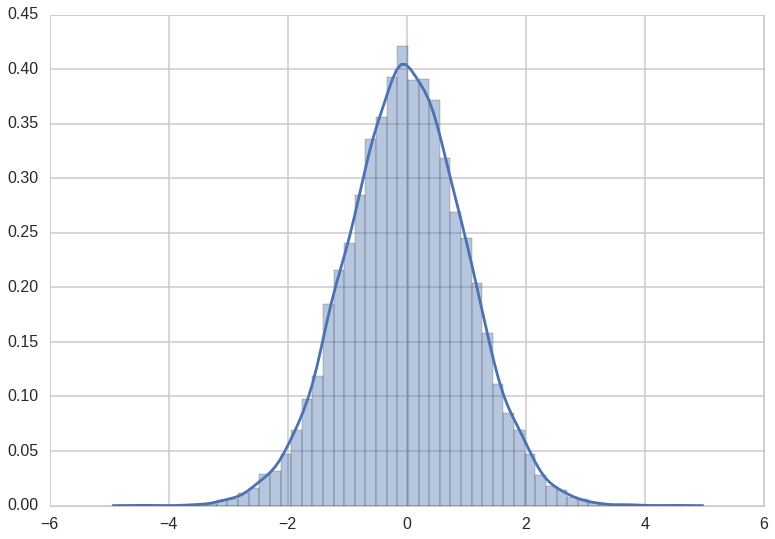

In [10]:
plot_histogram(samples)

In [11]:
print('Mean of samples: {}'.format(np.mean(samples)))
print('Standard deviation of samples: {}'.format(np.std(samples)))

Mean of samples: -0.005244864939578789
Standard deviation of samples: 0.995585650907929


In [12]:
another_sample_set = draw_samples(mu=0, sigma=1, n_samples=10000)

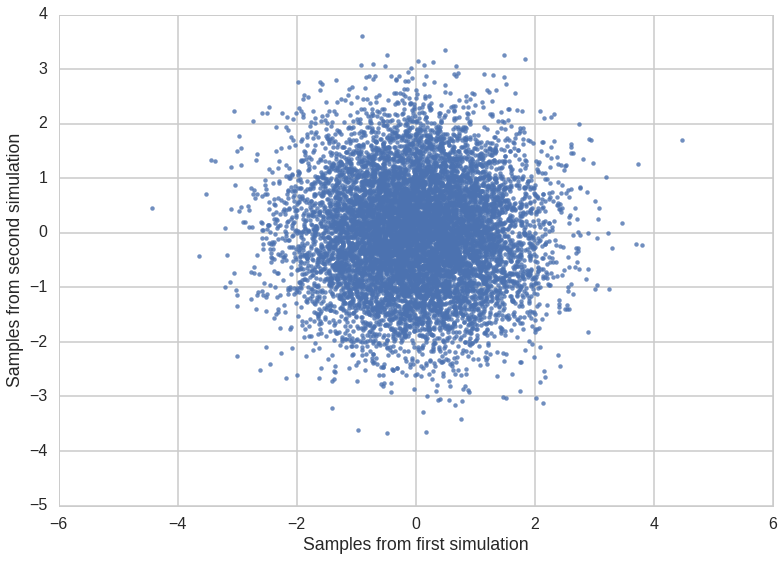

In [14]:
sns.regplot(samples, another_sample_set, fit_reg=False)
plt.xlabel('Samples from first simulation')
plt.ylabel('Samples from second simulation');

In [17]:
print('Fraction of samples that lie above diagonal line: {}'.\
      format(sum(another_sample_set > samples) / len(samples)))

Fraction of samples that lie above diagonal line: 0.4991
